No handles with labels found to put in legend.


           日期  證券代號 證券名稱      成交股數   成交筆數         成交金額    開盤價    最高價    最低價  \
4  2019-09-05  2330  台積電  49041728  22796  12869665251  263.0  263.0  260.5   

     收盤價  漲跌價差   漲跌幅   本益比  三大法人合計  
4  263.0   5.5  0.02  21.5   33003  
           日期  證券代號 證券名稱      成交股數   成交筆數        成交金額    開盤價    最高價    最低價  \
2  2019-09-03  2330  台積電  26086495  11210  6642868555  256.5  258.0  253.0   

     收盤價  漲跌價差   漲跌幅    本益比  三大法人合計  
2  254.0  -3.5 -0.01  20.77   -7714  


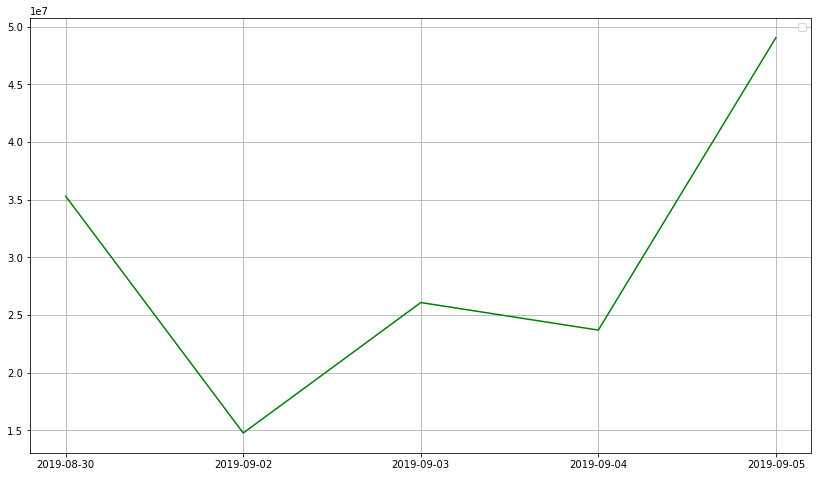

In [73]:
import util
from sqlalchemy import create_engine
from sqlalchemy.sql import text
import pandas as pd
import talib
import matplotlib.pyplot as plt

stockNo = '2330'

engine = util.create_db_connection()

# SELECT 日期,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,漲跌幅,本益比,三大法人合計 FROM daily_quote a INNER JOIN stock_big_investor b ON a.證券代號 = b.公司代碼 AND a.日期 = b.日期

df = pd.read_sql_query(text(f"SELECT 日期,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,漲跌幅,本益比 FROM daily_quote WHERE 證券代號 = '{stockNo}'"), engine)
df2 = pd.read_sql_query(text(f"SELECT 日期,公司代碼 as 證券代號,三大法人合計 FROM stock_big_investor WHERE 證券代號 = '{stockNo}'"), engine)
result = pd.merge(df, df2, how='inner', on=['日期', '證券代號'])
overbought = result[result['三大法人合計'] == result['三大法人合計'].max()]
oversold = result[result['三大法人合計'] == result['三大法人合計'].min()]
print(overbought)
print(oversold)
plt.figure(figsize=(14, 8))
plt.plot(result['日期'], result['成交股數'], color = 'green')
# The syntax to add the label created above
plt.legend()
# The syntax to add a grid
plt.grid()


In [64]:
df = pd.read_sql_query(text(f"SELECT 日期,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,漲跌幅,本益比 FROM daily_quote WHERE strftime('%Y',日期) = '2021'"), engine)
df_group = df.groupby('證券代號')

df_all = pd.DataFrame()

for name,group in df_group:
    group['RSI'] = talib.RSI(numpy.array(group.收盤價))
    df_all = df_all.append(group)
df_all.dropna(subset=["RSI"])
overbought = df_all[(df_all['RSI'] > 80)]
oversold = df_all[(df_all['RSI'] < 20)]
overbought,oversold

,日期,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,漲跌幅,本益比,RSI
13658,2021-01-25,1101,台泥,20825228,7500,851569715,40.65,41.10,40.60,40.90,0.30,0.01,9.74,19.444444
14636,2021-01-26,1101,台泥,35437633,16353,1433392327,40.70,40.90,40.20,40.35,-0.55,-0.01,9.61,16.697248
15614,2021-01-27,1101,台泥,17017733,9277,687706026,40.40,40.70,40.35,40.35,0.00,0.00,9.61,16.697248
16592,2021-01-28,1101,台泥,22411197,12318,903138507,40.25,40.60,40.20,40.25,-0.10,0.00,9.58,16.214193
17569,2021-01-29,1101,台泥,20902501,8346,841415228,40.25,40.45,40.15,40.15,-0.10,0.00,9.56,15.724293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14634,2021-01-25,9955,佳龍,176896,197,3196543,18.05,18.20,17.90,18.15,0.15,0.01,0.00,14.457831
15612,2021-01-26,9955,佳龍,150247,168,2724192,18.15,18.20,18.05,18.15,0.00,0.00,0.00,14.457831
16590,2021-01-27,9955,佳龍,98455,83,1787473,18.15,18.20,18.10,18.15,0.00,0.00,0.00,14.457831
17567,2021-01-28,9955,佳龍,324553,202,5806659,17.85,18.15,17.70,18.15,0.00,0.00,0.00,14.457831
